This Notebook is provided as an example on how to correct conductivity data collected from an RBRargo3 Argo float for compressibility errors.

It relies on the CSV file listing the appropriate coefficients:
https://github.com/ArgoDMQC/RBRargo_DMQC/blob/main/RBRargo3_compressibility_table.csv

As well as on an example profile from:
https://fleetmonitoring.euro-argo.eu/float/6903078


#### Import the required modules

In [1]:
import RBRargo3_compressibility as comp
import pandas as pd
import gsw
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Example code

Uses a sample file retrieved from euro-argo

https://fleetmonitoring.euro-argo.eu/float/6903078

The sample file is a CSV file with the data from the 1nd profile for WMO6903078

In [2]:
# Load the CSV file in pandas
argo = pd.read_csv('../../test_data/6903078_testdata.csv')

# Compute conductivity from saliniy using GSW TEOS-10 
argo['COND'] = gsw.C_from_SP(argo['PSAL (psu)'],argo['TEMP (degree_Celsius)'],argo['PRES (decibar)'])

# Applies the new compressibility correction for that particular float
Cnew = comp.compressibility_RBRargo3(argo['COND'],argo['PRES (decibar)'],argo['PRES_ADJUSTED (decibar)'],6903078)

Plot the difference in conductivity before and after the correction as a function of pressure 

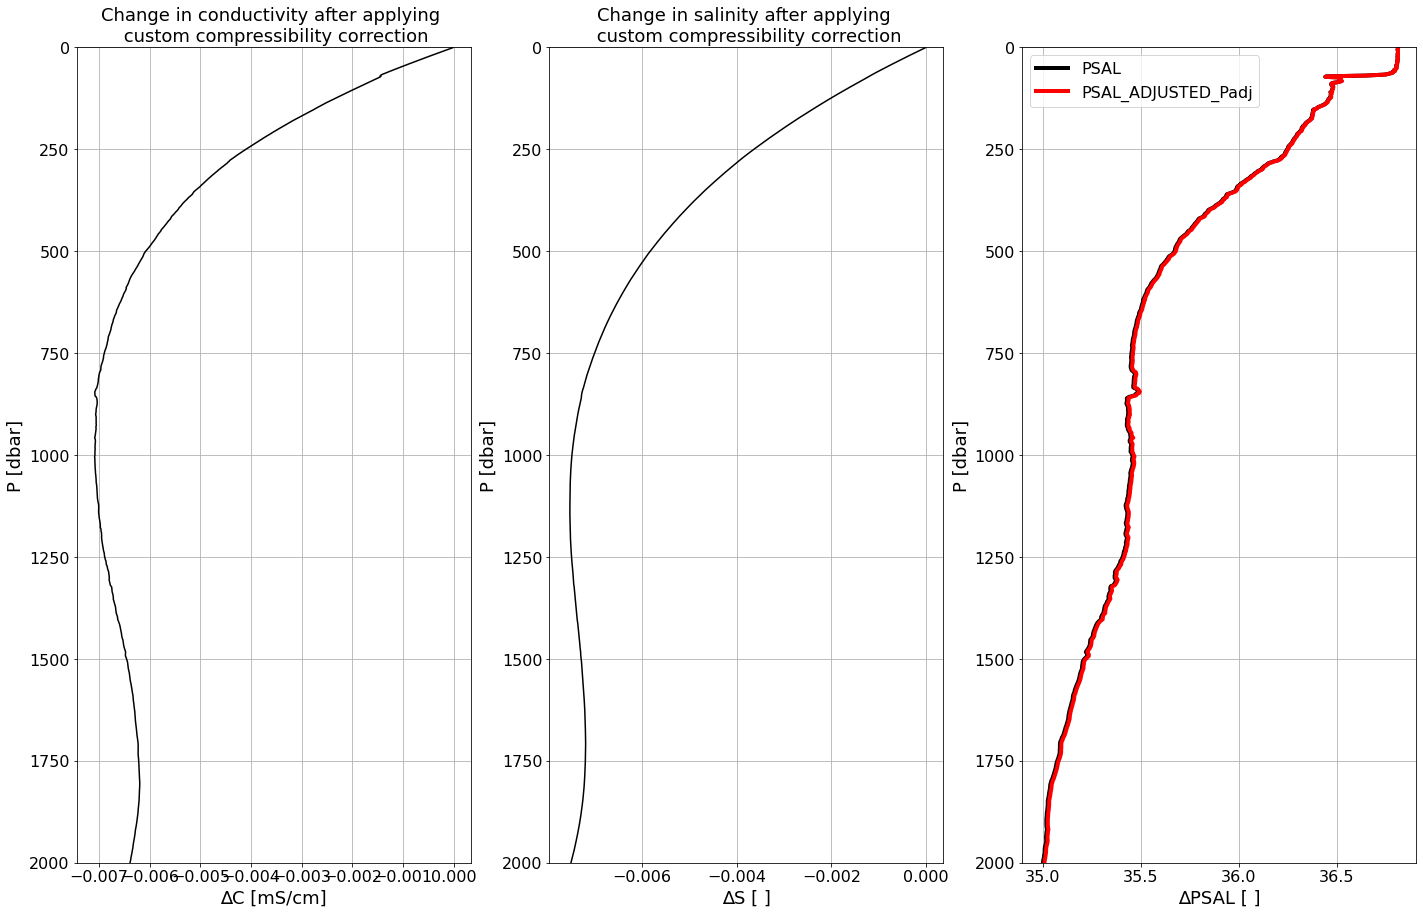

In [12]:
fig, ax = plt.subplots(1,3,figsize=(24,15))

plt.rcParams['font.size'] = '16'
ax[0].plot(argo.COND-Cnew,argo['PRES (decibar)'],color='k')
ax[0].set_ylim(2000,0)
ax[0].grid()
ax[0].set_ylabel('P [dbar]',fontsize=18)
ax[0].set_xlabel('∆C [mS/cm]',fontsize=18)
ax[0].set_title('Change in conductivity after applying \n custom compressibility correction',fontsize=18)

ax[1].plot(argo['PSAL (psu)']-gsw.SP_from_C(Cnew,argo['TEMP (degree_Celsius)'],argo['PRES (decibar)']),argo['PRES (decibar)'],color='k')
ax[1].set_ylim(2000,0)
ax[1].grid()
ax[1].set_ylabel('P [dbar]',fontsize=18)
ax[1].set_xlabel('∆S [ ]',fontsize=18)
ax[1].set_title('Change in salinity after applying \n custom compressibility correction',fontsize=18)

ax[2].plot(argo['PSAL (psu)'],argo['PRES (decibar)'],color='k',lw=4, label='PSAL')
ax[2].plot(gsw.SP_from_C(Cnew,argo['TEMP (degree_Celsius)'],argo['PRES (decibar)']),argo['PRES (decibar)'],color='r', lw=4, label='PSAL_ADJUSTED_Padj')
ax[2].set_ylim(2000,0)
ax[2].grid()
ax[2].set_ylabel('P [dbar]',fontsize=18)
ax[2].set_xlabel('∆PSAL [ ]',fontsize=18)
#ax[2].set_title('Change in salinity after applying \n custom compressibility correction',fontsize=18)
plt.legend()